In [1]:
# mencari directory saat ini
import os
os.getcwd()

'C:\\Users\\KOMPUTER\\Documents\\Jupyter Notebooks'

In [2]:
# Merubah directory
os.chdir('D:\\ITS\\Tugas Akhir\\Source Code')
# Merubah directory (beneran)
os.chdir('D:/ITS/Tugas Akhir/Source Code')

In [3]:
import numpy as np
import pandas as pd
import glob 

In [4]:
cur_path = "D:/ITS/Tugas Akhir/Source Code/Dataset/"

In [5]:
normal_file_names = glob.glob(cur_path+'/normal/*.csv')
imnormal_horizontal_misalignment = glob.glob(cur_path+'/horizontal-misalignment/*.csv')
imnormal_imbalance = glob.glob(cur_path+'/imbalance/*.csv')
imnormal_overhang = glob.glob(cur_path+'/overhang/*.csv')
imnormal_underhang = glob.glob(cur_path+'/underhang/*.csv')
imnormal_vertical_misalignment = glob.glob(cur_path+'/vertical-misalignment/*.csv')

In [6]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [7]:
data_normal = dataReader(normal_file_names)
data_horizontal_misalignment = dataReader(imnormal_horizontal_misalignment)
data_imbalance = dataReader(imnormal_imbalance)
data_overhang = dataReader(imnormal_overhang)
data_underhang = dataReader(imnormal_underhang)
data_vertical_misalignment = dataReader(imnormal_vertical_misalignment)

In [8]:
# DOWN SAMPLING

def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [9]:
data_normal = downSampler(data_normal, 0, 5000)
data_horizontal_misalignment = downSampler(data_horizontal_misalignment, 0, 5000)
data_imbalance = downSampler(data_imbalance, 0, 5000)
data_overhang = downSampler(data_overhang, 0, 5000)
data_underhang = downSampler(data_underhang, 0, 5000)
data_vertical_misalignment = downSampler(data_vertical_misalignment, 0, 5000)

In [10]:
data_horizontal_misalignment

,0,1,2,3,4,5,6,7
0,0.238683,0.040645,0.029216,0.005529,0.182794,-0.009161,0.068958,0.009503
1,-0.190134,0.016455,-0.014548,-0.000583,-0.910306,-0.017664,-0.165307,0.042894
2,-0.164461,0.042454,0.008994,0.003852,-0.033204,0.019210,-0.028226,-0.016421
3,0.231968,0.007944,-0.013105,-0.001158,0.421318,0.012364,0.054324,0.049591
4,-0.158552,0.005222,0.021708,0.004271,-0.888084,-0.017232,-0.142622,0.004031
...,...,...,...,...,...,...,...,...
2495,0.086365,0.027052,0.022299,0.004368,-0.025866,-0.003139,-0.697790,0.009832
2496,-0.037415,-0.012096,-0.009728,-0.007549,0.056508,0.014329,-0.226426,0.014492
2497,-0.043064,0.019605,-0.006078,0.001259,-0.083126,-0.015022,-0.566022,0.010978
2498,0.059385,-0.001419,0.007981,-0.000108,-0.001524,0.004681,-0.568967,0.009568


In [11]:
len(data_horizontal_misalignment)

2500

In [12]:
# FFT

from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [13]:
data_normal = FFT(data_normal)
data_horizontal_misalignment = FFT(data_horizontal_misalignment)
data_imbalance = FFT(data_imbalance)
data_overhang = FFT(data_overhang)
data_underhang = FFT(data_underhang)
data_vertical_misalignment = FFT(data_vertical_misalignment)

In [14]:
y_1 = pd.DataFrame(np.ones(int(len(data_normal)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_horizontal_misalignment)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_imbalance)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_overhang)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_underhang)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_vertical_misalignment)),1),5))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6], ignore_index=True)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
29889,5
29890,5
29891,5
29892,5


In [15]:
data = pd.concat([data_normal,data_horizontal_misalignment,data_imbalance,data_overhang,data_underhang,data_vertical_misalignment],ignore_index=True)

In [16]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.004542,0.004043,-0.000508,0.000439,-0.041326,-0.000943,-0.242164,0.017308,-0.040689,-0.007365,-0.214495,-0.004942,-0.004875,-0.008725,0.000094
1,-0.000463,-0.006171,-0.000274,-0.000107,0.025107,0.006428,-0.016934,0.055042,0.048654,0.008708,0.079617,-0.003387,-0.005380,-0.017382,0.000242
2,-0.003077,-0.001114,-0.000477,-0.000260,-0.003856,0.002246,-0.020680,0.034375,-0.011763,-0.003181,-0.010646,-0.005665,0.072528,-0.018492,0.000295
3,-0.006516,0.000796,0.001759,-0.000036,-0.000266,-0.002963,0.106971,-0.016764,-0.046561,-0.009971,-0.140352,-0.006682,0.049748,-0.020924,0.000353
4,0.006138,0.010242,-0.000674,0.001107,-0.060055,0.006426,-0.147358,0.028066,-0.051482,-0.011185,-0.326531,-0.011004,-0.026181,-0.018649,0.000435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29889,-0.029224,-0.000226,0.003633,0.001663,0.002900,0.001405,0.063125,0.020152,0.001345,0.000532,-0.020506,-0.001883,-0.079566,-0.002879,0.000751
29890,0.019075,-0.005153,-0.003448,-0.001551,-0.010146,-0.001645,-0.035378,-0.002168,0.000296,0.000267,-0.015576,-0.003808,-0.065268,-0.001350,0.000594
29891,0.022809,0.009418,0.003130,0.000732,0.000419,-0.001405,0.004503,-0.011716,-0.004550,-0.000865,-0.005601,0.000042,-0.033492,0.003051,0.000456
29892,-0.027277,-0.008474,-0.003293,-0.001010,0.007513,0.002006,0.049156,0.011372,0.004556,0.001147,0.004237,0.002143,0.019069,0.006350,0.000330


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle=True)

In [18]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (23915, 15)
Shape of Test Data : (5979, 15)


In [19]:
## kNN Machine Learning

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
outknn = knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=3NN Accuracy on Train Data: 0.9587706460380514
k=3NN Accuracy on Test Data: 0.7877571500250878


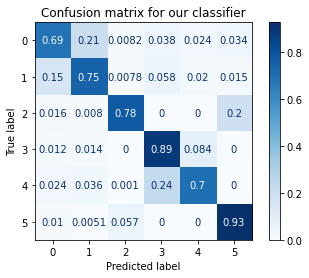

In [20]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix
matrix = plot_confusion_matrix(outknn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [21]:
## SVM Machine Learning

from sklearn.svm import SVC
svm = SVC(random_state = 1)
clf = svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM accuracy is 0.8025507003972402 on Train Dataset
SVM accuracy is 0.8011373139320956 on Test Dataset


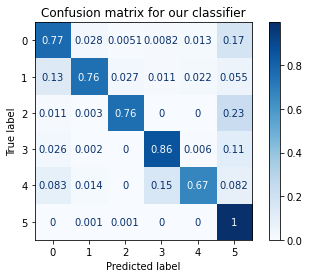

In [22]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [23]:
from sklearn.svm import SVC
import pickle
svm = SVC(random_state = 1)
clf = svm.fit(X_train,y_train)
# save the model to disk
filename = 'finalized_model.sav'

pickle.dump(clf, open(filename, 'wb'))

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.8011373139320956

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import pickle
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
outknn = knn.fit(X_train,y_train)
# save the model to disk
filename = 'KNN_model.sav'

pickle.dump(outknn, open(filename, 'wb'))

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [26]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.7877571500250878

In [27]:
# output dibuat prediksi sampel datanya
# data vibrasi saja yg di excel

In [74]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred_prob = knn.predict_proba(X_test)

C:\Users\KOMPUTER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [78]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2490,-0.026426,0.038069,0.348592,0.006748,3.061005,0.305219,2.124139,-0.036670,44.270976,0.426127,37.945610,1.428725,9.954850,1.101694,0.369654
4418,0.024939,0.077655,0.035581,0.004501,0.384070,0.200445,-0.015425,0.547853,1.274836,0.303538,-10.289026,0.234862,-3.102850,0.329215,0.070116
19080,0.237369,0.039684,0.269279,-0.012198,-2.495538,0.296811,-0.401867,0.076002,-4.617438,-0.022784,-3.759163,0.579413,-0.688212,0.168950,0.182073
17092,0.650843,-0.645155,0.557425,0.013997,4.916371,3.693565,1.728728,1.126507,7.590753,0.087959,4.062207,1.927144,0.846758,0.515357,0.511143
937,0.073501,-0.050380,0.099539,-0.022625,0.330057,-0.121507,0.096136,0.310405,5.002988,0.244743,-6.211039,0.359481,-5.231482,0.524672,0.139752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,0.598413,0.089092,0.319474,-0.007799,0.474019,0.577842,0.979397,0.354327,-0.953226,-0.181763,-1.236176,0.077530,-3.772324,0.111397,0.359350
29811,0.107203,-0.012341,-0.004511,-0.010014,-0.003490,0.001401,0.225330,-0.147827,-0.000200,0.002332,-0.070379,-0.010654,-2.168009,0.000158,0.011792
2724,-0.111850,-0.082941,0.060930,-0.004526,0.779890,0.493287,0.700907,0.496599,-3.239635,0.175275,-3.159724,0.999015,-2.174744,0.972511,0.329608
22220,0.560872,0.763494,0.534106,0.060002,-2.770522,1.180804,-0.196445,0.793446,4.765006,-1.025628,1.672721,0.966006,0.193770,0.661794,0.502876


In [75]:
pred

array([1, 1, 3, ..., 1, 4, 4])

In [76]:
pred_prob

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [77]:
np.argmax(pred_prob)
label_dict = {0:'normal', 1:'horizontal_misalignment', 2:'imbalance', 3:'overhang', 4:'underhang', 5:'vertical_misalignment'}
label_dict[np.argmax(pred_prob)]

'horizontal_misalignment'